In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('car_data.csv')
data.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Get numerical data
data_num = data.select_dtypes(include=[np.number])
data_num.head()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


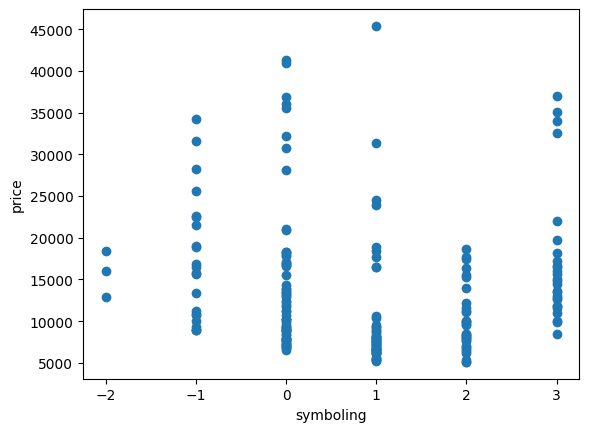

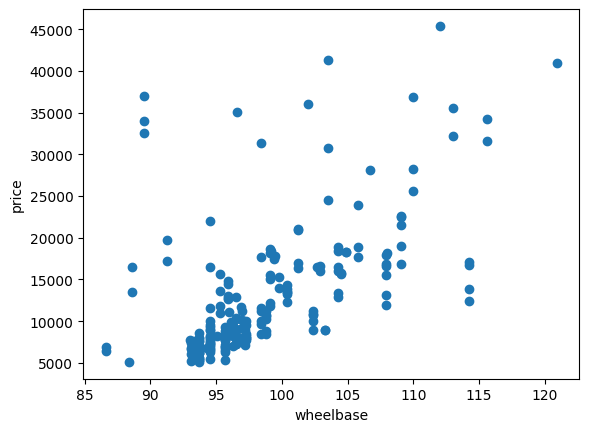

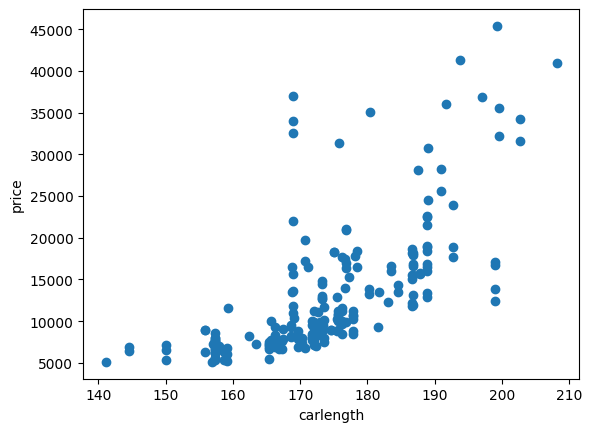

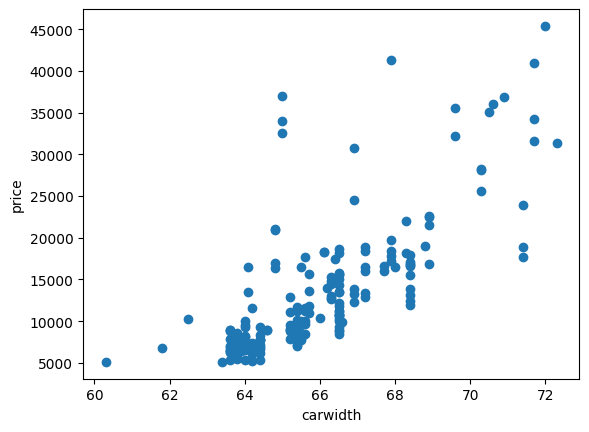

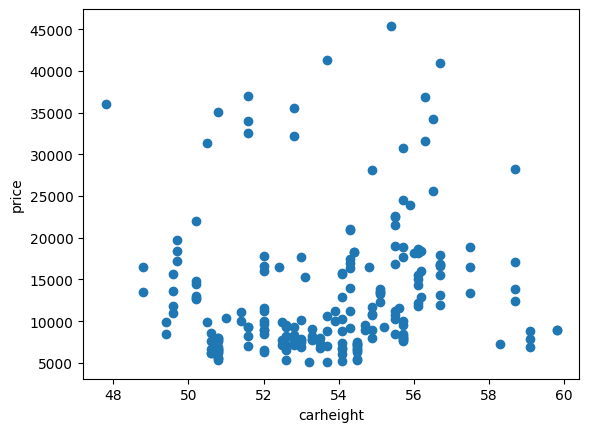

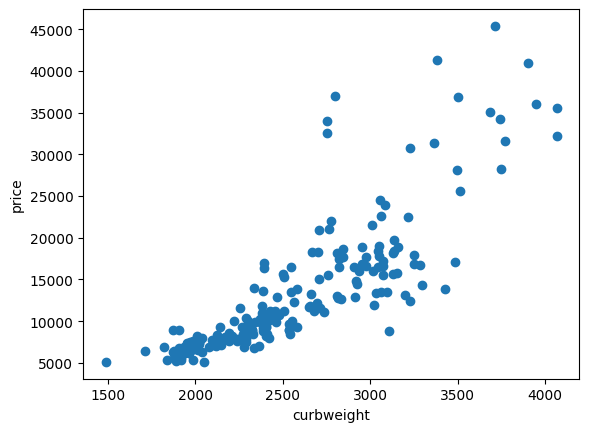

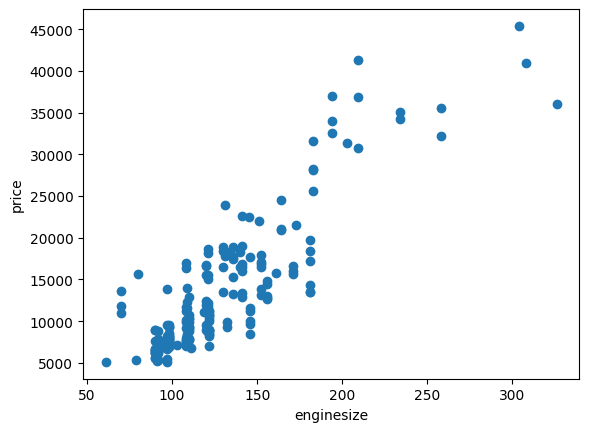

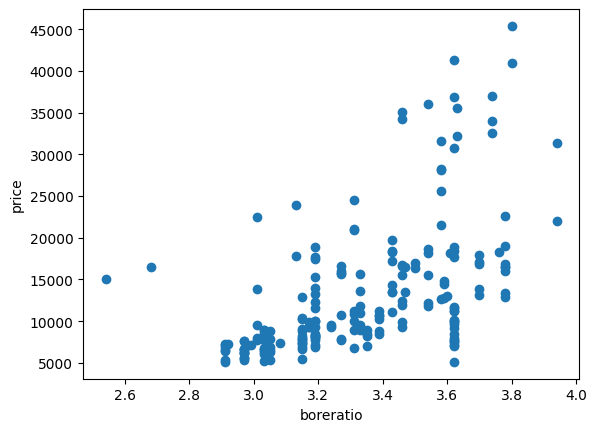

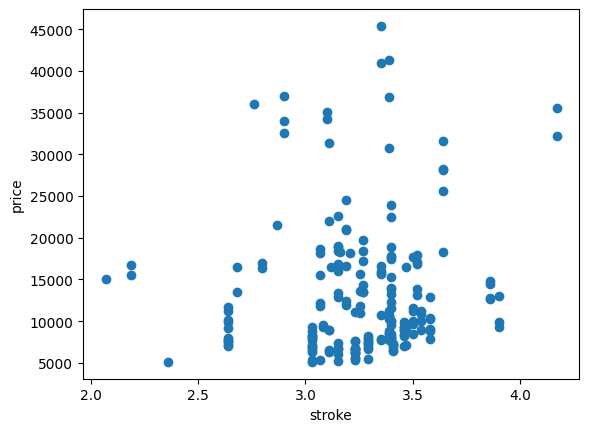

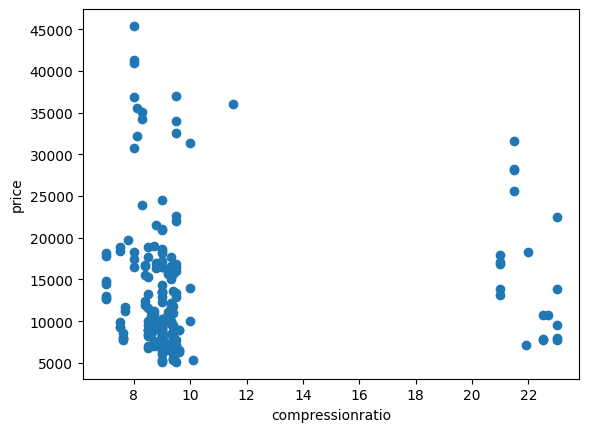

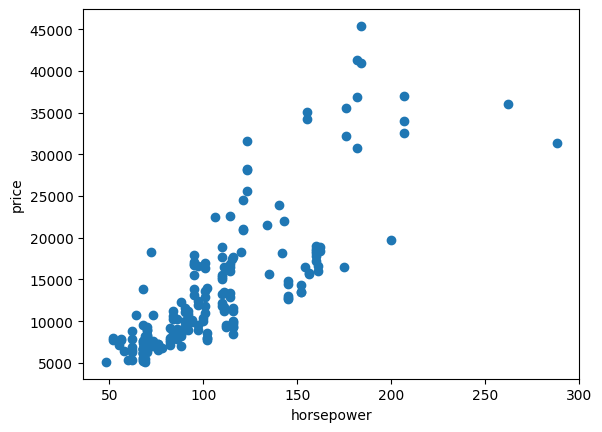

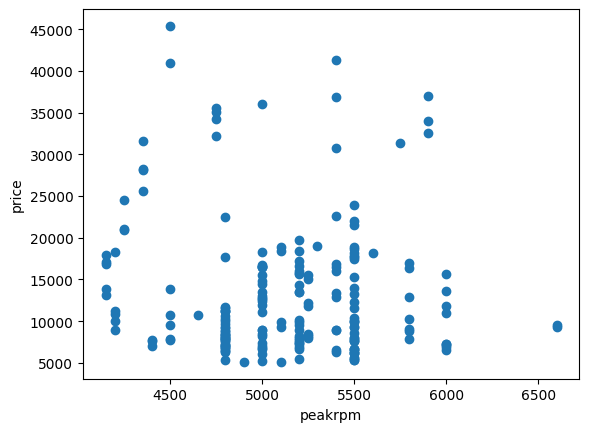

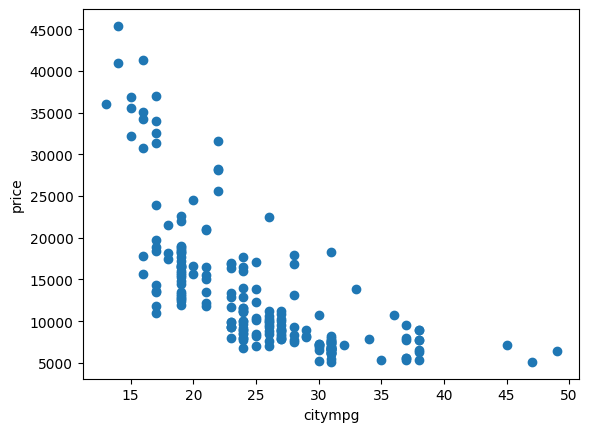

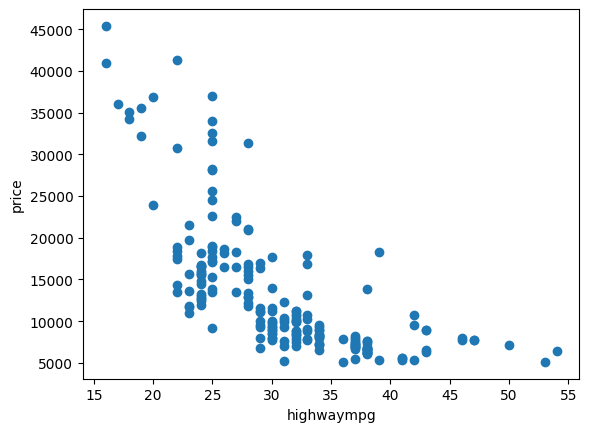

In [4]:
# Scatter plot numerical data to price
for col in data_num.columns[1:-1]:
    plt.scatter(data_num[col], data['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

# Chosen features are:
# 'carwidth', 'curbweight', 'enginesize', 'horsepower'

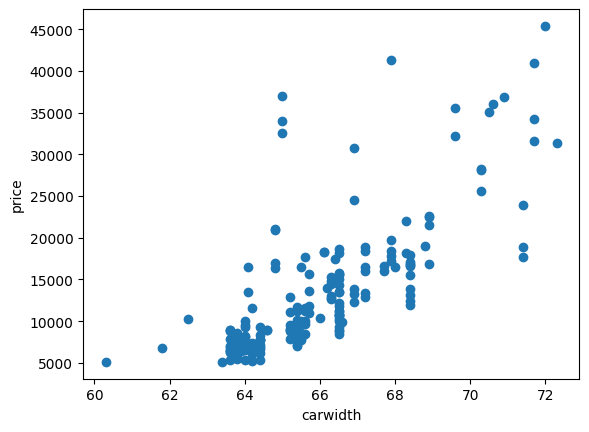

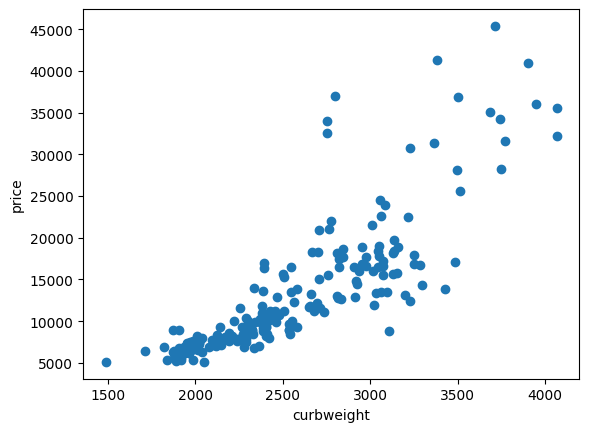

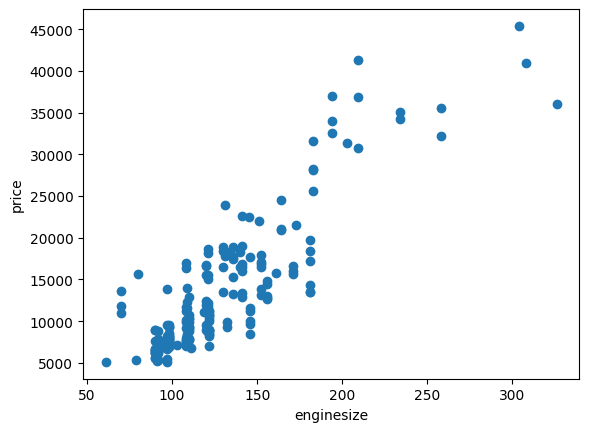

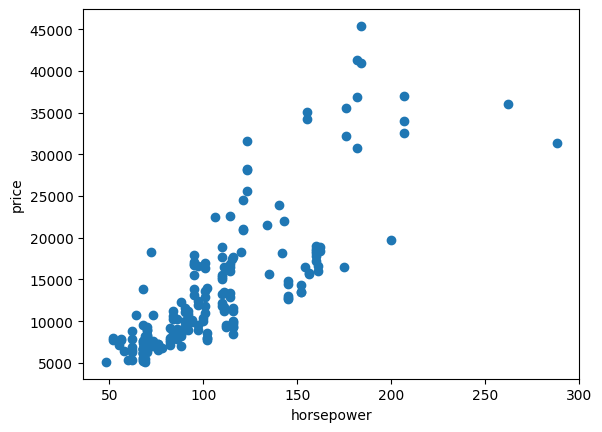

In [5]:
# Plot chosen features
for col in ['carwidth', 'curbweight', 'enginesize', 'horsepower']:
    plt.scatter(data_num[col], data['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

In [6]:
# Get chosen features
data_chosen = data[['carwidth', 'curbweight', 'enginesize', 'horsepower', 'price']]

# Shuffle data
data_chosen = data_chosen.sample(frac=1).reset_index(drop=True)

# Split data into train and test
train = data_chosen[:int(len(data_chosen)*0.8)]
test = data_chosen[int(len(data_chosen)*0.8):]

# Normalize data
train_norm = (train - train.min()) / (train.max() - train.min())
test_norm = (test - test.min()) / (test.max() - test.min())

Iteration: 0, Error: 2.0791215736325785
Iteration: 1, Error: 1.7693846736158099
Iteration: 2, Error: 1.5061390589258337
Iteration: 3, Error: 1.2824051374054275
Iteration: 4, Error: 1.0922511508174657
Iteration: 5, Error: 0.9306358653080755
Iteration: 6, Error: 0.7932748784854069
Iteration: 7, Error: 0.6765269975913182
Iteration: 8, Error: 0.5772976755266251
Iteration: 9, Error: 0.4929569438631086
Iteration: 10, Error: 0.42126966643408903
Iteration: 11, Error: 0.3603362638358747
Iteration: 12, Error: 0.30854233685988025
Iteration: 13, Error: 0.2645158528739534
Iteration: 14, Error: 0.22709075974009135
Iteration: 15, Error: 0.1952760623133412
Iteration: 16, Error: 0.16822954143377855
Iteration: 17, Error: 0.14523541844190263
Iteration: 18, Error: 0.1256853728826673
Iteration: 19, Error: 0.10906240998958991
Iteration: 20, Error: 0.09492715011625733
Iteration: 21, Error: 0.08290617651234913
Iteration: 22, Error: 0.07268213242838475
Iteration: 23, Error: 0.06398530492542115
Iteration: 24, E

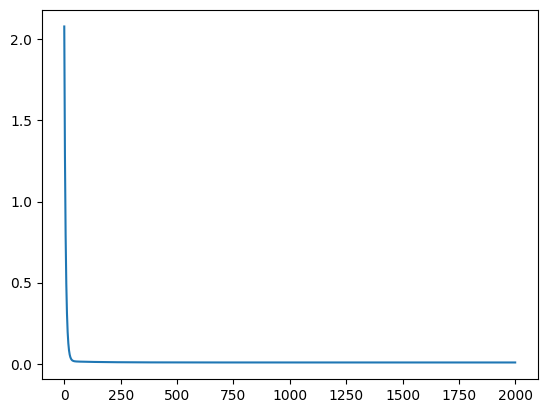

In [7]:
# Linear regression
w = np.random.rand(4)
b = np.random.rand(1)

LEARNING_RATE = .05
ITERATIONS = 2000

cost = []
# Train
for i in range(ITERATIONS):
    features = train_norm.iloc[:, :-1]

    y_pred = np.dot(features, w) + b
    error = y_pred - train_norm['price']
    w -= LEARNING_RATE * np.dot(error, features) / len(error)
    b -= LEARNING_RATE * error.mean()

    cost.append((error ** 2).mean())
    print('Iteration: {}, Error: {}'.format(i, (error ** 2).mean()))

# Plot cost
plt.plot(cost)
plt.show()

In [8]:
w

array([0.23679916, 0.10101996, 0.5004119 , 0.32801988])

In [9]:
b

array([-0.15211976])

In [10]:
# Test
features = test_norm.iloc[:, :-1]

y_pred = np.dot(features, w) + b
error = (y_pred - test_norm['price']) ** 2

error.mean()

0.010518578198000447